#1 Data preparation


In [1]:
%%shell

###########################################
#### RUN THIS CELL TO PREPARE DATA ########
###########################################

gdown -q 1VEG0qsiD5CZqyKSv5k6TceJbLOCt2yp7
echo 'download: done => file: animals.zip'
rm -rf ./animals/
unzip -q animals.zip
echo 'Data files in: /content/animals/'


download: done => file: animals.zip
Data files in: /content/animals/


#2 Samples

In [2]:
import glob
import os

#list all files and directories in a folder; here, ./animals/
os.listdir('./animals/')

['meta.txt', 'cat', 'horse', 'chicken', 'dog', 'goose']

In [3]:
#path is a file?
os.path.isfile('./animals/cat')

False

In [4]:
#path is a directory?

os.path.isdir('./animals/cat')

True

In [5]:
#path is a file?
os.path.isfile('./animals/meta.txt')

True

In [6]:
#path is a directory?
os.path.isdir('./animals/meta.txt')

False

In [7]:
# get file-size in bytes
os.path.getsize('./animals/cat/cat-1.jpg')

6828

In [8]:
#list all files a given extension; here, *.jpg
files = glob.glob("./animals/cat/*.jpg")
files

['./animals/cat/cat-4.jpg',
 './animals/cat/cat-6.jpg',
 './animals/cat/cat-1.jpg',
 './animals/cat/cat-2.jpg']

In [9]:
data_path = './animals'
class_path = 'dog'
file = 'dog-1.jpg'
path1 = os.path.join(data_path, class_path)
path2 = os.path.join(data_path, class_path, file)
print(path1)
print(path2)

./animals/dog
./animals/dog/dog-1.jpg


#3 Exercises

##Q.1

In [11]:
"""
Fill code this cell to:
1. list all of classes (sub-folders of the folder sepecified in 'path_to_data')
2. assign variables 'classes' to contain the classes discovered in previous step.
"""

import glob
import os

path_to_data = './animals/'
classes: list
#YOUR CODE IS HERE
classes = [x for x in os.listdir(path_to_data) if os.path.isdir(os.path.join(path_to_data, x))]
print(classes)

['cat', 'horse', 'chicken', 'dog', 'goose']


##Q.2

In [12]:
"""
Fill code this cell to:
1. create a dictionary (named: class2counts)
  to map from classes (folders) to their number of data files stored the folders

NOTE: use comprehension instead of for-loop
"""

path_to_data = './animals/'
# YOUR CODE IS HERE, only 2-3 lines
class2counts = {x: len(glob.glob(os.path.join(path_to_data, x, '*.jpg'))) for x in classes}
class2counts


{'cat': 4, 'horse': 4, 'chicken': 4, 'dog': 5, 'goose': 3}

##Q.3

In [13]:
"""
Fill code this cell to:
1. list all files in the folder stored in variable "path_to_data"
2. store the returned filenames in a list named: files
3. make a report as shown in the output cell followed

NOTE: use comprehension if possible
"""
import functools as F

path_to_data = './animals/'

# YOUR CODE IS HERE, only 3-4 lines
files = list(glob.glob('./animals/*/*.jpg'))
report = F.reduce(lambda x, y: x + y, [f'{x}\n' for x in files])
print(report)



./animals/cat/cat-4.jpg
./animals/cat/cat-6.jpg
./animals/cat/cat-1.jpg
./animals/cat/cat-2.jpg
./animals/horse/horse-5.jpg
./animals/horse/horse-1.jpg
./animals/horse/horse-4.jpg
./animals/horse/horse-2.jpg
./animals/chicken/c1.jpg
./animals/chicken/c3.jpg
./animals/chicken/c2.jpg
./animals/chicken/c5.jpg
./animals/dog/dog-7.jpg
./animals/dog/dog-1.jpg
./animals/dog/dog-6.jpg
./animals/dog/dog-2.jpg
./animals/dog/dog-3.jpg
./animals/goose/g3.jpg
./animals/goose/g2.jpg
./animals/goose/g1.jpg



##Q.4

In [14]:
"""
Fill code this cell to:
1. list all files in the folder stored in variable "path_to_data"
2. create a dictionary to map each file to its label (class)
3. make a report as shown in the output cell followed

NOTE: use comprehension if possible
"""
import functools as F

path_to_data = './animals/'

# YOUR CODE IS HERE
file2label = {x: x.split('/')[-2] for x in glob.glob('./animals/*/*.jpg')}
report = F.reduce(lambda x, y: x + y, [f'{x}: {y}\n' for x, y in file2label.items()], '{')[:-1] + '}'
print(report)



{./animals/cat/cat-4.jpg: cat
./animals/cat/cat-6.jpg: cat
./animals/cat/cat-1.jpg: cat
./animals/cat/cat-2.jpg: cat
./animals/horse/horse-5.jpg: horse
./animals/horse/horse-1.jpg: horse
./animals/horse/horse-4.jpg: horse
./animals/horse/horse-2.jpg: horse
./animals/chicken/c1.jpg: chicken
./animals/chicken/c3.jpg: chicken
./animals/chicken/c2.jpg: chicken
./animals/chicken/c5.jpg: chicken
./animals/dog/dog-7.jpg: dog
./animals/dog/dog-1.jpg: dog
./animals/dog/dog-6.jpg: dog
./animals/dog/dog-2.jpg: dog
./animals/dog/dog-3.jpg: dog
./animals/goose/g3.jpg: goose
./animals/goose/g2.jpg: goose
./animals/goose/g1.jpg: goose}


##Q.5


In [15]:
"""
Fill code this cell to:
make a report as shown in the output cell followed

NOTE: use comprehension if possible
"""
import functools as F

path_to_data = './animals/'

# YOUR CODE IS HERE
print("=" * 80)
x, y, z = "File' name", "File's size", "File's label"
print(f"{x: <40} | {y: <15} | {z: <15}")
print("=" * 80)
report = F.reduce(lambda x, y: x + y, [f"{x: <40} | {os.path.getsize(x): <15} | {file2label[x]: <15}\n" for x in glob.glob('./animals/*/*.jpg')])[:-1]
print(report)
print("=" * 80)




File' name                               | File's size     | File's label   
./animals/cat/cat-4.jpg                  | 6444            | cat            
./animals/cat/cat-6.jpg                  | 4526            | cat            
./animals/cat/cat-1.jpg                  | 6828            | cat            
./animals/cat/cat-2.jpg                  | 7784            | cat            
./animals/horse/horse-5.jpg              | 6595            | horse          
./animals/horse/horse-1.jpg              | 9122            | horse          
./animals/horse/horse-4.jpg              | 5907            | horse          
./animals/horse/horse-2.jpg              | 9533            | horse          
./animals/chicken/c1.jpg                 | 10598           | chicken        
./animals/chicken/c3.jpg                 | 11038           | chicken        
./animals/chicken/c2.jpg                 | 5619            | chicken        
./animals/chicken/c5.jpg                 | 6538            | chicken        

In [21]:
"""
Fill code this cell to:
make a report as shown in the output cell followed

NOTE:
* Files MUST BE SORTED in file's label
* use comprehension if possible
"""
import functools as F

path_to_data = './animals/'

# YOUR CODE IS HERE
file2label = dict(sorted(file2label.items(), key=lambda x: x[1]))
print("=" * 80)
x, y, z = "File' name", "File's size", "File's label"
print(f"{x: <40} | {y: <15} | {z: <15}")
print("=" * 80)
report = F.reduce(lambda x, y: x + y, [f"{x: <40} | {os.path.getsize(x): <15} | {file2label[x]: <15}\n" for x in file2label.keys()])[:-1]
print(report)
print("=" * 80)





File' name                               | File's size     | File's label   
./animals/cat/cat-6.jpg                  | 4526            | cat            
./animals/cat/cat-4.jpg                  | 6444            | cat            
./animals/cat/cat-1.jpg                  | 6828            | cat            
./animals/cat/cat-2.jpg                  | 7784            | cat            
./animals/chicken/c2.jpg                 | 5619            | chicken        
./animals/chicken/c5.jpg                 | 6538            | chicken        
./animals/chicken/c1.jpg                 | 10598           | chicken        
./animals/chicken/c3.jpg                 | 11038           | chicken        
./animals/dog/dog-2.jpg                  | 5756            | dog            
./animals/dog/dog-1.jpg                  | 5936            | dog            
./animals/dog/dog-3.jpg                  | 7491            | dog            
./animals/dog/dog-7.jpg                  | 8409            | dog            

##Q.6

In [20]:
"""
Fill code this cell to:
make a report as shown in the output cell followed

NOTE:
* Files MUST BE SORTED in file's size
* use comprehension if possible
"""
import functools as F

path_to_data = './animals/'

# YOUR CODE IS HERE
file2label = dict(sorted(file2label.items(), key=lambda x: os.path.getsize(x[0])))
print("=" * 80)
x, y, z = "File' name", "File's size", "File's label"
print(f"{x: <40} | {y: <15} | {z: <15}")
print("=" * 80)
report = F.reduce(lambda x, y: x + y, [f"{x: <40} | {os.path.getsize(x): <15} | {file2label[x]: <15}\n" for x in file2label.keys()])[:-1]
print(report)
print("=" * 80)




File' name                               | File's size     | File's label   
./animals/cat/cat-6.jpg                  | 4526            | cat            
./animals/chicken/c2.jpg                 | 5619            | chicken        
./animals/dog/dog-2.jpg                  | 5756            | dog            
./animals/horse/horse-4.jpg              | 5907            | horse          
./animals/dog/dog-1.jpg                  | 5936            | dog            
./animals/goose/g3.jpg                   | 6240            | goose          
./animals/cat/cat-4.jpg                  | 6444            | cat            
./animals/chicken/c5.jpg                 | 6538            | chicken        
./animals/horse/horse-5.jpg              | 6595            | horse          
./animals/cat/cat-1.jpg                  | 6828            | cat            
./animals/goose/g1.jpg                   | 7347            | goose          
./animals/dog/dog-3.jpg                  | 7491            | dog            

##Q.7

In [26]:
"""
Fill code this cell to:
make a report as shown in the output cell followed

NOTE:
* Files MUST BE RE-ORDERED RAMDOMLY: use function 'random.sample'
* use comprehension if possible
"""
import functools as F
import random

path_to_data = './animals/'

# YOUR CODE IS HERE
file2label = dict(random.sample(list(file2label.items()), len(file2label)))
print("=" * 80)
x, y, z = "File' name", "File's size", "File's label"
print(f"{x: <40} | {y: <15} | {z: <15}")
print("=" * 80)
report = F.reduce(lambda x, y: x + y, [f"{x: <40} | {os.path.getsize(x): <15} | {file2label[x]: <15}\n" for x in file2label.keys()])[:-1]
print(report)
print("=" * 80)




File' name                               | File's size     | File's label   
./animals/dog/dog-2.jpg                  | 5756            | dog            
./animals/horse/horse-4.jpg              | 5907            | horse          
./animals/dog/dog-6.jpg                  | 8562            | dog            
./animals/cat/cat-2.jpg                  | 7784            | cat            
./animals/cat/cat-6.jpg                  | 4526            | cat            
./animals/chicken/c1.jpg                 | 10598           | chicken        
./animals/horse/horse-1.jpg              | 9122            | horse          
./animals/chicken/c3.jpg                 | 11038           | chicken        
./animals/chicken/c2.jpg                 | 5619            | chicken        
./animals/chicken/c5.jpg                 | 6538            | chicken        
./animals/dog/dog-3.jpg                  | 7491            | dog            
./animals/goose/g1.jpg                   | 7347            | goose          

##Q.8
The cell followed shows an example for reading and displaying image from a given file.

* Note: the figure's title is the label of the image

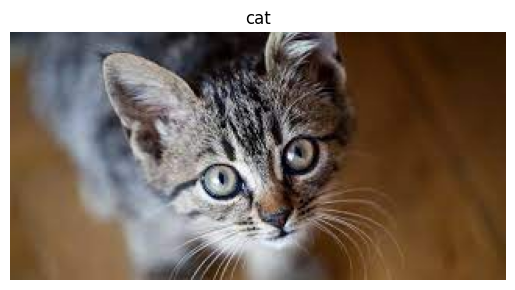

In [23]:
import cv2
import matplotlib.pyplot as plt

filename = './animals/cat/cat-1.jpg'
label = 'cat'
image = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(image)
plt.axis('off')
plt.title(label)
plt.show()

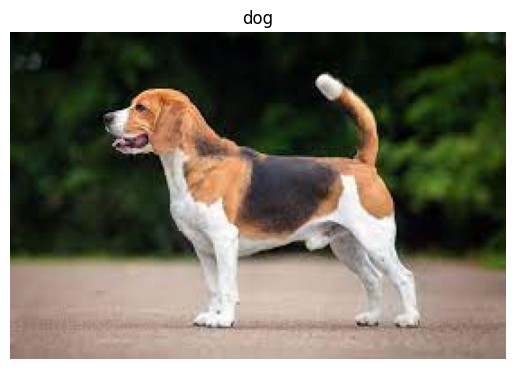

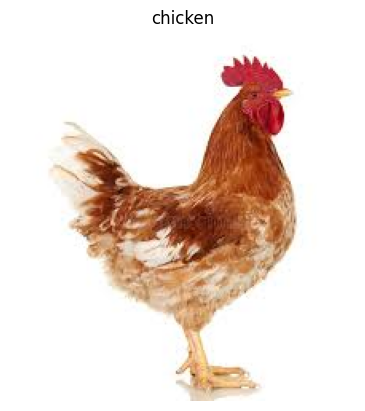

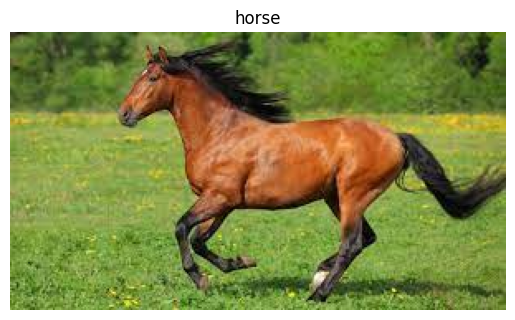

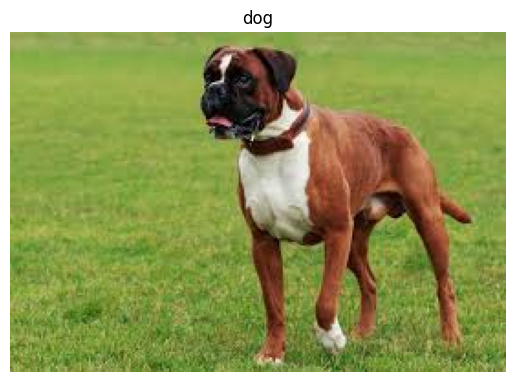

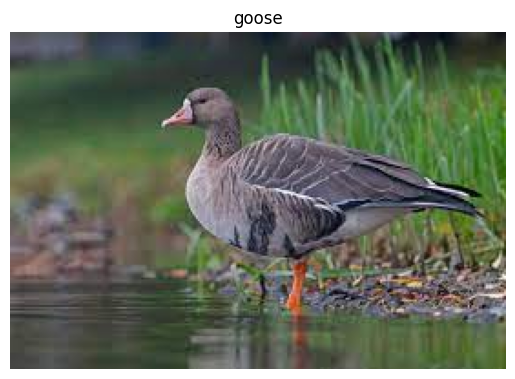

In [25]:
"""
Fill code this cell to:
1. Selecte 5 files randomly
2. Read and display them as shown in the output cell followed

NOTE:
* use comprehension if possible
"""
import functools as F
import random

path_to_data = './animals/'

# YOUR CODE IS HERE
files = random.sample(glob.glob('./animals/*/*.jpg'), 5)
for file in files:
    label = file.split('/')[-2]
    image = cv2.cvtColor(cv2.imread(file), cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(image)
    plt.axis('off')
    plt.title(label)
    plt.show()





#4 Define functions

***Define functions for each questions given above***